<a href="https://colab.research.google.com/github/adrian-ai-salud/adrian-ai-salud/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 1

## CARGA DE LA BASE DE DATOS
Selecciona el archivo ejercicio2.csv de tu PC



In [30]:
from google.colab import files

# Cargar un archivo desde tu PC
uploaded = files.upload()

# Para ver los archivos que fueron cargados
import pandas as pd

# Para leer el archivo y manejar el error de codificación
for filename in uploaded.keys():
    try:
        df = pd.read_csv(filename, encoding='latin1')  # Cambia 'latin1' por la codificación correcta si es necesario
        print(f'Archivo cargado: {filename}')
        print(df.head())  # Muestra las primeras filas del DataFrame
    except Exception as e:
        print(f'Error al cargar el archivo {filename}: {e}')

Saving Ejercicio2.csv to Ejercicio2 (1).csv
Archivo cargado: Ejercicio2 (1).csv
                       HP       City   Time        Day    BW  BPD   AD Sex  \
0  H.G.U.Gregorio Maranon     Madrid  13:20    Viernes  2200   82   90   M   
1        H.U.de Bellvitge  Barcelona  11:00      Lunes  4100   97  129   M   
2        H.U.de Bellvitge  Barcelona  00:00     Martes  4200   97  133   F   
3                H.Clinic  Barcelona  18:38     Jueves  1300   74   71   M   
4       H.U.12 de octubre     Madrid  09:53  Miercoles  1150   68   80   F   

   Ge Sm  
0  33  N  
1  43  N  
2  43  N  
3  33  S  
4  33  S  


##Visualiza la dataset

In [ ]:
df.head()

,HP,City,Time,Day,BW,BPD,AD,Sex,Ge,Sm
0,H.G.U.Gregorio Maranon,Madrid,13:20,Viernes,2200,82,90,M,33,N
1,H.U.de Bellvitge,Barcelona,11:00,Lunes,4100,97,129,M,43,N
2,H.U.de Bellvitge,Barcelona,00:00,Martes,4200,97,133,F,43,N
3,H.Clinic,Barcelona,18:38,Jueves,1300,74,71,M,33,S
4,H.U.12 de octubre,Madrid,09:53,Miercoles,1150,68,80,F,33,S


## Realizar un análisis descriptivo visual  y evaluar las correlaciones entre las variables numéricas. (0.5 punto).

Si las variables son numéricas, utilizad histogramas y gráficos de cajas, si son categóricas, gráfico de barras.

En colab, podemos utilizar Géminis que nos ayude!!

=== Tabla Descriptiva ===
      count     mean     std     min      25%     50%     75%     max  skew  \
BW    300.0  2660.79  760.91  1025.0  2124.00  2680.0  3100.0  4850.0  0.18   
BPD   300.0    88.94    6.35    64.0    86.75    91.0    93.0   100.0 -1.60   
AD    300.0   100.97   11.66    71.0    93.75   102.0   108.0   133.0 -0.05   
Ge    300.0    36.24    3.17    33.0    33.00    36.0    38.0    43.0  0.77   
Time  300.0    10.43    4.65     0.0     8.00    10.0    13.0    23.0  0.14   

      kurt  
BW    0.06  
BPD   3.25  
AD    0.55  
Ge   -0.45  
Time  0.35  



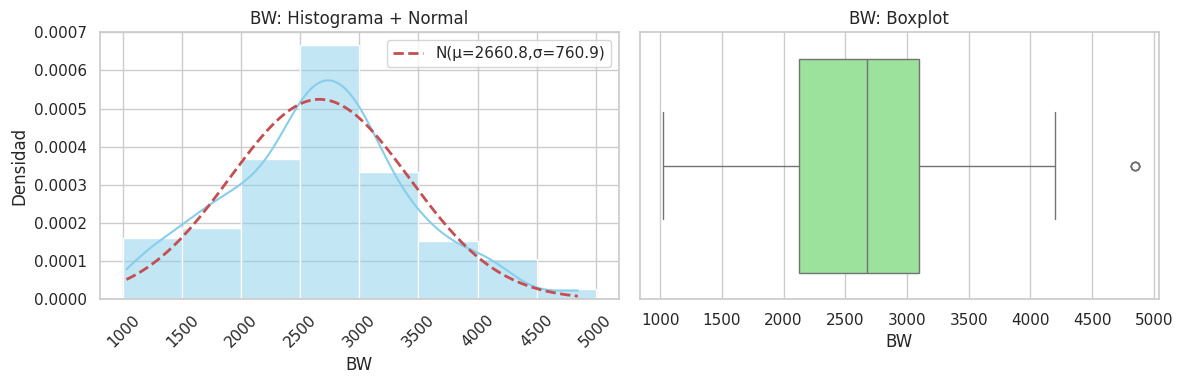

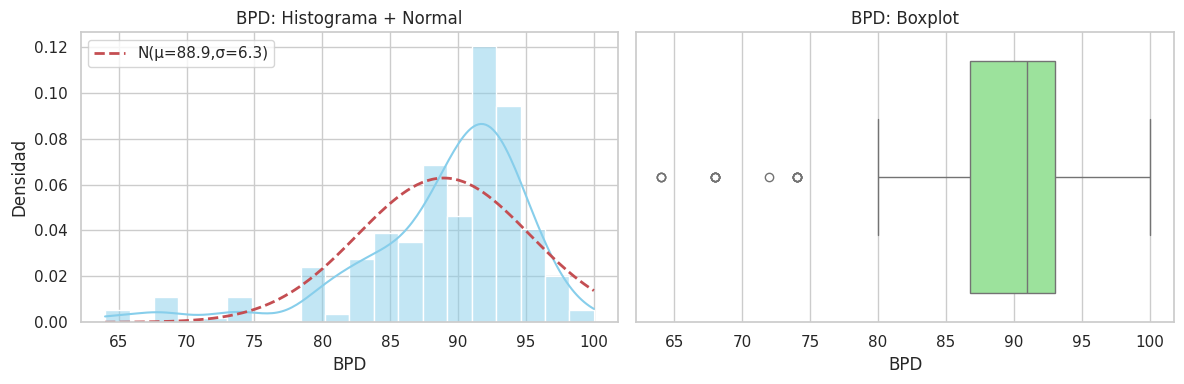

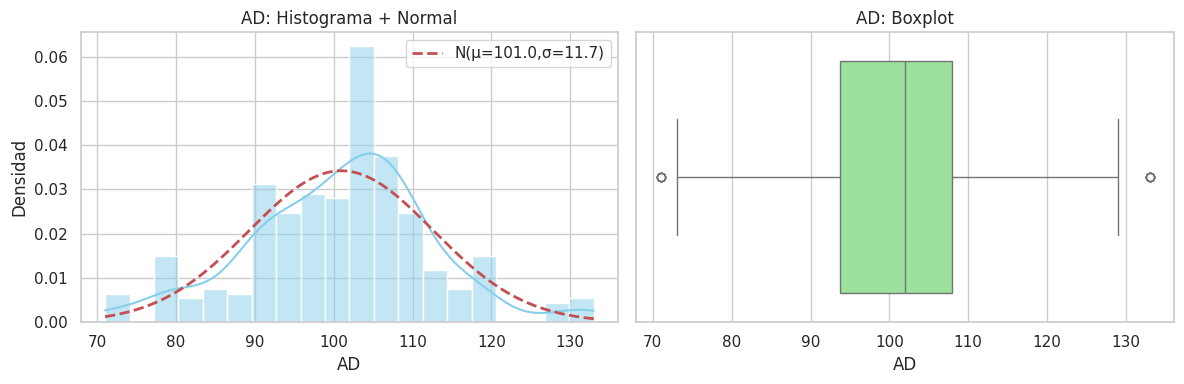

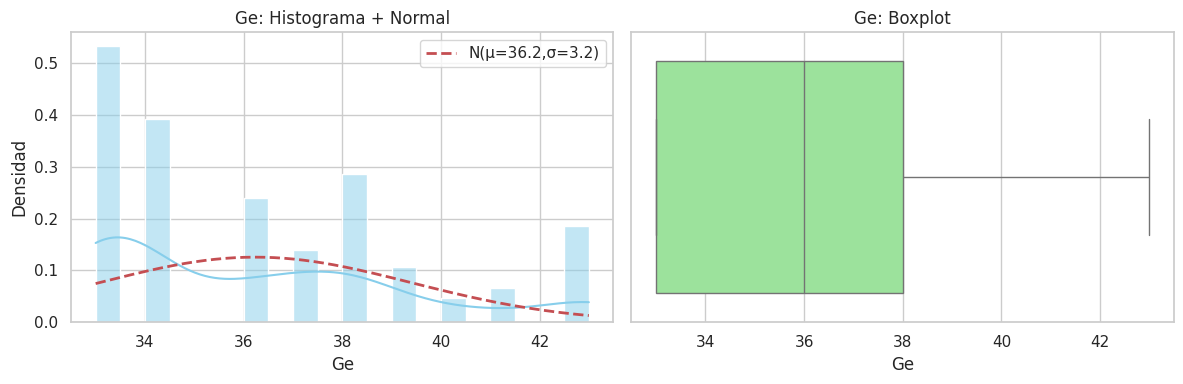

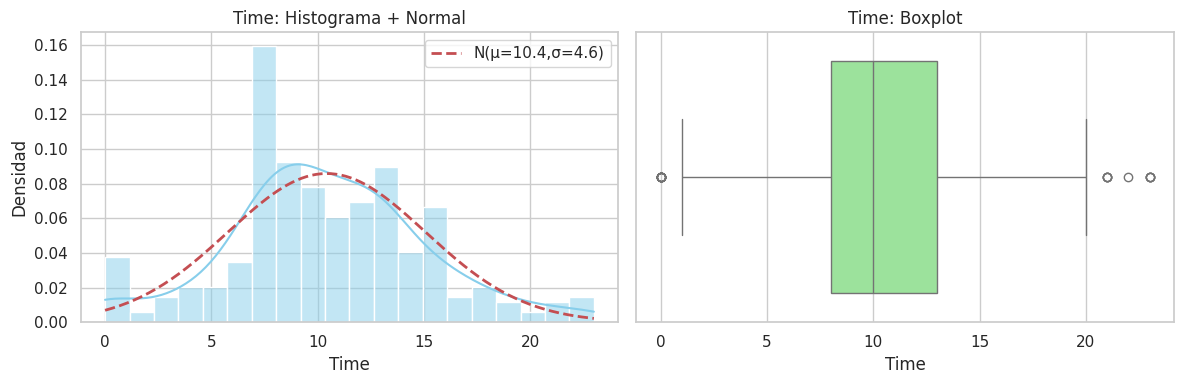

<ipython-input-31-0e93501ea557>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='pastel',


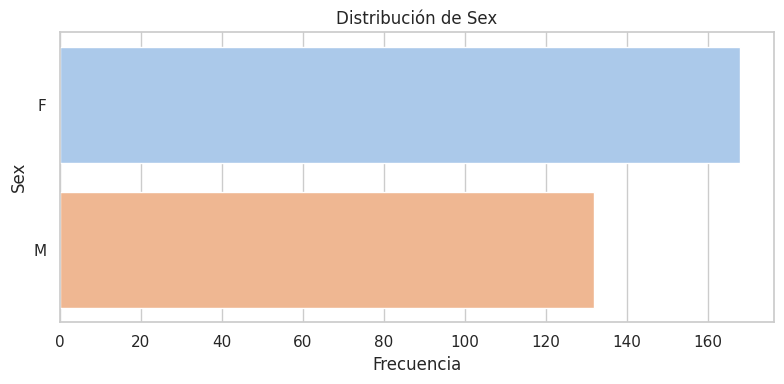

<ipython-input-31-0e93501ea557>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='pastel',


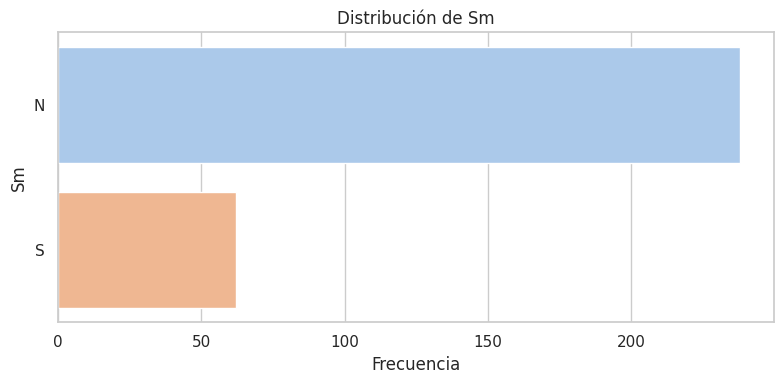

<ipython-input-31-0e93501ea557>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='pastel',


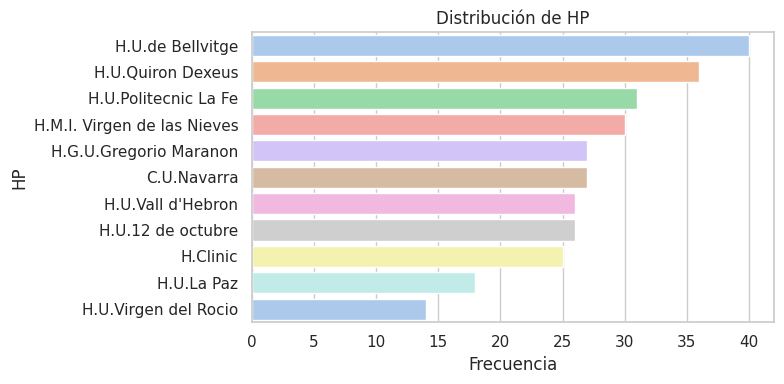

<ipython-input-31-0e93501ea557>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='pastel',


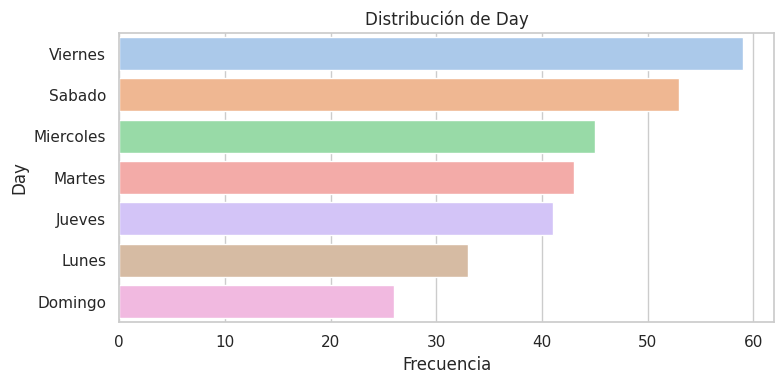

<ipython-input-31-0e93501ea557>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette='pastel',


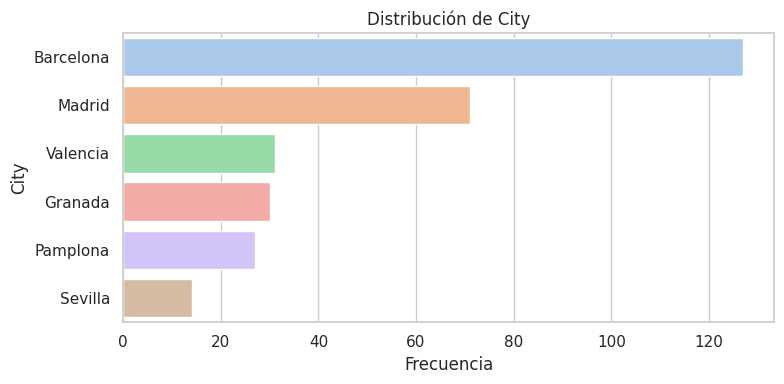

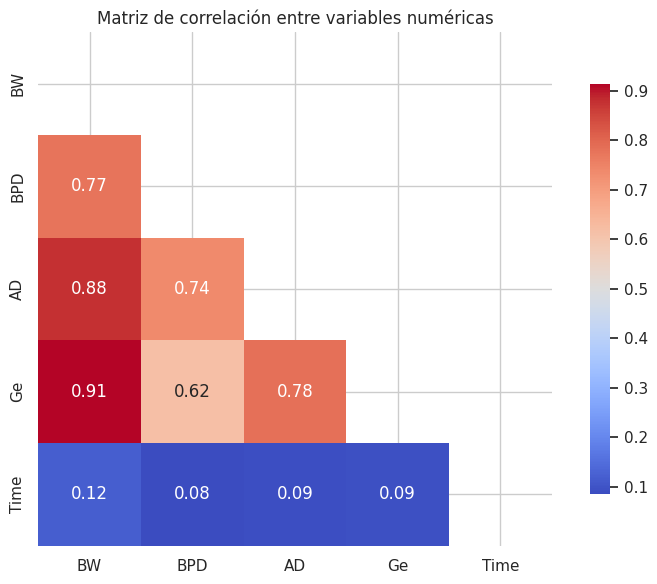

In [31]:
# 1. Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style='whitegrid')

# 2. Carga de datos
df = pd.read_csv('/content/Ejercicio2.csv', encoding='latin1')
df.columns = df.columns.str.strip()  # quitar espacios en encabezados

# 3. Definición de variables
medidas     = ['BW', 'BPD', 'AD', 'Ge']  # vienen con coma decimal
numericas   = medidas + ['Time']
categoricas = ['Sex', 'Sm', 'HP', 'Day', 'City']

# 4. Saneamiento de medidas: coma → punto y float
for col in medidas:
    if col in df.columns:
        df[col] = (
            df[col].astype(str)
                   .str.replace(',', '.', regex=False)
                   .pipe(pd.to_numeric, errors='coerce')
        )

# 5. Convertir Time solo con datetime → hora entera
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

# 6. Eliminar filas con NaN en las medidas o en 'Sm'
to_drop = medidas + ['Sm']
df = df.dropna(subset=[c for c in to_drop if c in df.columns])

# 7. Tabla descriptiva con skewness y kurtosis
desc = df[numericas].describe().T
desc['skew'] = df[numericas].skew().values
desc['kurt'] = df[numericas].kurtosis().values
print("=== Tabla Descriptiva ===")
print(desc[['count','mean','std','min','25%','50%','75%','max','skew','kurt']].round(2))
print()

# 8. Histograma + KDE + curva normal teórica + boxplot
for col in numericas:
    data = df[col].dropna()
    mu, sigma = data.mean(), data.std(ddof=1)

    fig, (ax_h, ax_b) = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma y KDE
    if col == 'BW':
        lo = int(np.floor(data.min() / 500) * 500)
        hi = int(np.ceil (data.max() / 500) * 500)
        bins = np.arange(lo, hi+500, 500)
    else:
        bins = 20

    sns.histplot(data, bins=bins, stat='density', kde=True,
                 ax=ax_h, color='skyblue', edgecolor='white')
    x = np.linspace(data.min(), data.max(), 200)
    ax_h.plot(x, stats.norm.pdf(x, mu, sigma),
              'r--', lw=2, label=f'N(μ={mu:.1f},σ={sigma:.1f})')
    ax_h.set_title(f'{col}: Histograma + Normal')
    ax_h.set_xlabel(col)
    ax_h.set_ylabel('Densidad')
    ax_h.legend()
    if col == 'BW':
        ax_h.set_xticks(bins)
        ax_h.tick_params(axis='x', rotation=45)

    # Boxplot
    sns.boxplot(x=data, ax=ax_b, color='lightgreen')
    ax_b.set_title(f'{col}: Boxplot')
    ax_b.set_xlabel(col)

    plt.tight_layout()
    plt.show()

# 9. Distribución de categóricas
for col in categoricas:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], palette='pastel',
                      order=df[col].value_counts().index)
        plt.title(f'Distribución de {col}')
        plt.xlabel('Frecuencia')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# 10. Matriz de correlación (solo lower triangle)
cols_corr = [c for c in numericas if c in df.columns]
corr = df[cols_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
            cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8})
plt.title('Matriz de correlación entre variables numéricas')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()


Matriz de correlación de Spearman:


,BW,BPD,AD,Ge,Time
BW,1.000,0.786,0.867,0.955,0.120
BPD,0.786,1.000,0.708,0.771,0.054
AD,0.867,0.708,1.000,0.838,0.091
Ge,0.955,0.771,0.838,1.000,0.109
Time,0.120,0.054,0.091,0.109,1.000


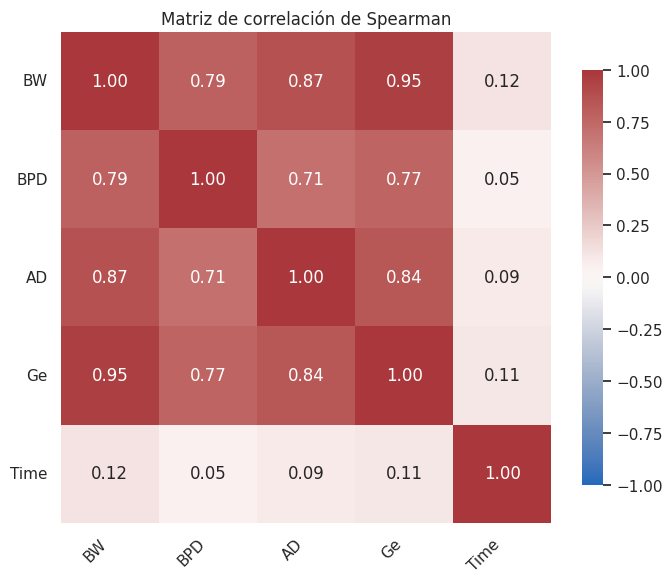

In [81]:
# 1. Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carga y saneamiento (igual que antes)
df = pd.read_csv('/content/Ejercicio2.csv', encoding='latin1')
df.columns = df.columns.str.strip()

# Convertir comas a puntos y forzar float en las medidas
medidas = ['BW','BPD','AD','Ge']
for col in medidas:
    if col in df:
        df[col] = (df[col].astype(str)
                         .str.replace(',', '.', regex=False)
                         .pipe(pd.to_numeric, errors='coerce'))
# Convertir Time de "HH:MM" a hora entera
if 'Time' in df:
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

# 3. Seleccionar solo las columnas numéricas, eliminar NaN
numericas = ['BW','BPD','AD','Ge','Time']
df_num = df[numericas].apply(pd.to_numeric, errors='coerce').dropna()

# 4. Cálculo de matriz de Spearman
spearman_corr = df_num.corr(method='spearman')

# 5. Mostrar la matriz como DataFrame
print("Matriz de correlación de Spearman:")
display(spearman_corr.round(3))

# 6. (Opcional) Heatmap de Spearman
plt.figure(figsize=(7,6))
sns.heatmap(
    spearman_corr,
    annot=True,
    fmt=".2f",
    cmap='vlag',
    vmin=-1, vmax=1,
    square=True,
    cbar_kws={'shrink':.8}
)
plt.title('Matriz de correlación de Spearman')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [43]:
for col in df.columns:
    print(f"'{col}'")


'HP'
'City'
'Time'
'Day'
'BW'
'BPD'
'AD'
'Sex'
'Ge'
'Sm'


# Comprobación de los supuestos parar lanzar ANOVA

In [44]:
import pandas as pd
from scipy.stats import shapiro, kstest, norm, levene
import IPython.display as display

# Cargar datos
df = pd.read_csv('/content/Ejercicio2.csv', encoding='latin1')
df.columns = df.columns.str.strip()

# Forzar conversión a numérico (evitar errores por datos tipo texto)
for col in ['BW', 'BPD', 'AD', 'Ge', 'Time']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Nuevas variables numéricas válidas
numericas = ['BW', 'BPD', 'AD', 'Ge']

# Normalidad
normalidad_resultados = []
for var in numericas:
    datos = df[var].dropna()
    ks_stat, ks_p = kstest(datos, 'norm', args=(datos.mean(), datos.std()))
    shapiro_stat, shapiro_p = shapiro(datos)
    normalidad_resultados.append({
        'Variable': var,
        'Shapiro-Wilk (p)': round(shapiro_p, 4),
        'Kolmogorov-Smirnov (p)': round(ks_p, 4)
    })

df_normalidad = pd.DataFrame(normalidad_resultados)

# Levene entre sexos
df['Sex'] = df['Sex'].astype(str).str.strip()
levene_resultados = []
for var in numericas:
    grupo_F = df[df['Sex'] == 'F'][var].dropna()
    grupo_M = df[df['Sex'] == 'M'][var].dropna()
    if len(grupo_F) > 0 and len(grupo_M) > 0:
        stat, pval = levene(grupo_F, grupo_M)
        levene_resultados.append({
            'Variable': var,
            'Levene (p)': round(pval, 4)
        })

df_levene = pd.DataFrame(levene_resultados)

# Mostrar
print("Resultados del análisis de normalidad:")
display.display(df_normalidad)

print("\nResultados del test de Levene (igualdad de varianzas entre sexos):")
display.display(df_levene)


Resultados del análisis de normalidad:


,Variable,Shapiro-Wilk (p),Kolmogorov-Smirnov (p)
0,BW,0.0043,0.1436
1,BPD,0.0000,0.0000
2,AD,0.0004,0.0315
3,Ge,0.0000,0.0000



Resultados del test de Levene (igualdad de varianzas entre sexos):


,Variable,Levene (p)
0,BW,0.5645
1,BPD,0.6136
2,AD,0.7391
3,Ge,0.1315


# No se cumples supuestos De normalidad para todas la variables numéricas salvo para peso al nacer

# Asunción de normalidad. Evaluar si las variables numéricas provienen de una distribución normal y si se ajustan a las exigencias de un test ANOVA (0.5)

Evaluar un test ANOVA que analice el peso del bebé y la categoría “madre fumadora”, y también un test NO paramétrico (1 punto

In [45]:
for col in df.columns:
    print(f"'{col}'")
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Análisis ANOVA
model = ols('BW ~ C(Sm)', data=df).fit()  # C(Sm) considera 'Sm' como categórica
anova_result = sm.stats.anova_lm(model, typ=1)
print("Resultados del ANOVA:\n", anova_result)

'HP'
'City'
'Time'
'Day'
'BW'
'BPD'
'AD'
'Sex'
'Ge'
'Sm'
Resultados del ANOVA:
              df        sum_sq       mean_sq           F        PR(>F)
C(Sm)       1.0  7.863942e+07  7.863942e+07  247.777316  5.132866e-41
Residual  297.0  9.426168e+07  3.173794e+05         NaN           NaN


In [47]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Asumimos que ya tienes df cargado y saneado de antes
# (BW numérico y Sm categórica)

# 1) Prepara cada grupo: limpia NaN e Inf
grouped = []
for name, grp in df.groupby('Sm'):
    bw = grp['BW'].replace([np.inf, -np.inf], np.nan).dropna()
    cnt = len(bw)
    uniq = bw.nunique()
    print(f"Grupo {name!r}: n={cnt}, únicos={uniq}")
    # Requerimos al menos 2 observaciones y más de 1 valor único
    if cnt >= 2 and uniq > 1:
        grouped.append(bw.values)
    else:
        print(f"  → omitido (n<2 o sin variabilidad)")

# 2) Asegurarnos de que queden al menos 2 grupos válidos
if len(grouped) < 2:
    raise ValueError("No hay suficientes grupos con datos válidos para Kruskal–Wallis")

# 3) Ejecutar Kruskal–Wallis
kruskal_result = stats.kruskal(*grouped)
print("\nResultados del Test de Kruskal–Wallis:")
print(f"Estadística: {kruskal_result.statistic:.4f}, p-valor: {kruskal_result.pvalue:.4f}")


Grupo 'N': n=238, únicos=36
Grupo 'S': n=61, únicos=22

Resultados del Test de Kruskal–Wallis:
Estadística: 128.5779, p-valor: 0.0000


<ipython-input-48-ebd143d107ef>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Fumadora', y='BW', data=df, palette='pastel', inner='box')


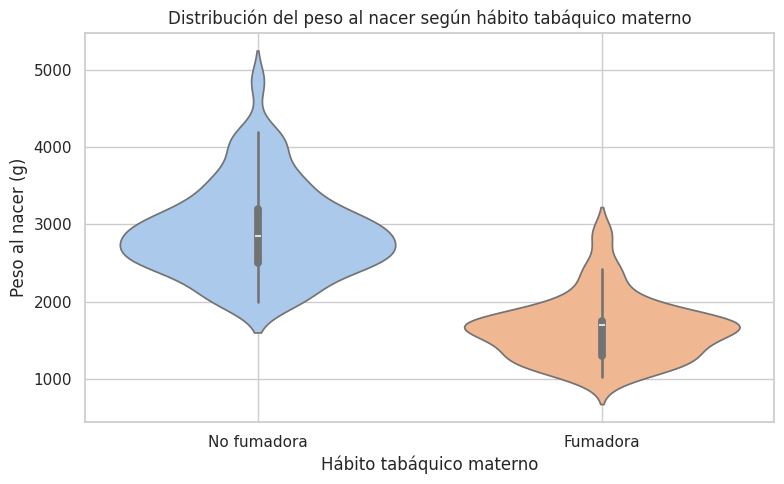

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('/content/Ejercicio2.csv', encoding='latin1')
df.columns = df.columns.str.strip()

# Limpiar y traducir etiquetas
df['Sm'] = df['Sm'].astype(str).str.strip()
df['BW'] = pd.to_numeric(df['BW'], errors='coerce')
df['Fumadora'] = df['Sm'].map({'N': 'No fumadora', 'S': 'Fumadora'})

# Gráfico de violín
plt.figure(figsize=(8, 5))
sns.violinplot(x='Fumadora', y='BW', data=df, palette='pastel', inner='box')
plt.title('Distribución del peso al nacer según hábito tabáquico materno')
plt.xlabel('Hábito tabáquico materno')
plt.ylabel('Peso al nacer (g)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
df.columns

Index(['HP', 'City', 'Time', 'Day', 'BW', 'BPD', 'AD', 'Sex', 'Ge', 'Sm',
       'Fumadora'],
      dtype='object')

## Vamos a definir la variable peso del bebé como variable dependiente. Y vamos a realizar los siguientes cálculos:
-	Entre las variables numéricas, escoger el modelo de regresión lineal simple que tenga mayor “bondad” en el ajuste (0.5 puntos).


In [50]:
X = df[['AD', 'BPD', 'Ge']]
y = df['BW']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Cargar librerías
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Supongamos que ya tienes tu DataFrame 'df' cargado con las columnas AD, BPD, Ge
X = df[['AD', 'BPD', 'Ge']]

# Añadir constante para el intercepto
X_const = sm.add_constant(X)

# Calcular VIF para cada variable
vif_data = pd.DataFrame({
    'variable': X_const.columns,
    'VIF': [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})

print(vif_data)


  variable         VIF
0    const  244.621842
1       AD    3.507609
2      BPD    2.202340
3       Ge    2.604075


In [73]:
import pandas as pd
from scipy.stats import spearmanr

# Supongamos que df ya está cargado y contiene BW, AD, BPD, Ge
predictores = ['AD', 'BPD', 'Ge']
resultados = []

for var in predictores:
    rho, p = spearmanr(df[var], df['BW'], nan_policy='omit')
    resultados.append({
        'Predictor': var,
        'Spearman ρ': round(rho, 3),
        'p‑valor': round(p, 4)
    })

tabla_spearman = pd.DataFrame(resultados)
print(tabla_spearman)


  Predictor  Spearman ρ  p‑valor
0        AD       0.867      0.0
1       BPD       0.786      0.0
2        Ge       0.955      0.0


In [75]:
import statsmodels.api as sm
import numpy as np

# Lista de predictores para regresión lineal simple
predictors = ['Ge', 'AD', 'BPD']
y = df['BW']

for var in predictors:
    # Definir matriz de diseño con constante + predictor
    X = sm.add_constant(df[var])

    # Ajuste OLS
    model = sm.OLS(y, X).fit()

    # Imprimir título y summary
    print(f"\n=== Modelo simple BW ~ {var} ===")
    print(model.summary())

    # Extraer y mostrar R2, RMSE, F y p‑valor
    r2    = model.rsquared
    rmse  = np.sqrt((model.resid**2).mean())
    f_val = model.fvalue
    p_val = model.f_pvalue
    print(f"R²       = {r2:.3f}")
    print(f"RMSE (g) = {rmse:.1f}")
    print(f"F(1, {int(model.df_resid)}) = {f_val:.1f}, p = {p_val:.3g}")



=== Modelo simple BW ~ Ge ===
                            OLS Regression Results                            
Dep. Variable:                     BW   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1510.
Date:                Wed, 07 May 2025   Prob (F-statistic):          1.12e-118
Time:                        11:27:02   Log-Likelihood:                -2145.1
No. Observations:                 300   AIC:                             4294.
Df Residuals:                     298   BIC:                             4302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5280.7042

In [68]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

# Supongamos que 'df' ya está cargado y contiene las columnas BW, AD, BPD, Ge
candidatos = ['AD', 'BPD', 'Ge']
resultados = []

for var in candidatos:
    # Ajuste del modelo simple
    modelo = ols(f'BW ~ {var}', data=df).fit()
    # Métricas
    r2       = modelo.rsquared
    r2_adj   = modelo.rsquared_adj
    rmse     = np.sqrt((modelo.resid**2).mean())
    f_stat   = modelo.fvalue
    p_f      = modelo.f_pvalue

    resultados.append({
        'Predictor': var,
        'R2': round(r2, 2),
        'Adj. R2': round(r2_adj, 2),
        'RMSE (g)': int(rmse),
        'F (1, n-2)': round(f_stat, 1),
        'p‑valor F': f"< {modelo.f_pvalue:.3f}"
    })

tabla = pd.DataFrame(resultados)
print(tabla)


  Predictor    R2  Adj. R2  RMSE (g)  F (1, n-2) p‑valor F
0        AD  0.77     0.77       367       975.5   < 0.000
1       BPD  0.60     0.60       480       447.9   < 0.000
2        Ge  0.84     0.83       308      1509.7   < 0.000


In [87]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Carga y limpieza
df = pd.read_csv('/content/Ejercicio2.csv', encoding='latin1')
df.columns = df.columns.str.strip()

# 2) Variables
predictoras = ['BPD', 'AD', 'Ge']
respuesta   = 'BW'

# 3) Convertir comas a puntos y forzar float
for col in predictoras + [respuesta]:
    df[col] = (df[col]
                .astype(str)
                .str.replace(',', '.', regex=False)
                .pipe(pd.to_numeric, errors='coerce'))

# 4) Eliminar filas con NaN en X o y
df_clean = df.dropna(subset=predictoras + [respuesta])

# 5) Train/test split
X = df_clean[predictoras]
y = df_clean[respuesta]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6) Añadir constante y ajustar OLS
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

# 7) Mostrar summary
print(model.summary())

# 8) Evaluación en test set
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("\nMétricas en test set:")
print(f"MSE: {mse:.2f}")
print(f"R² : {r2:.2f}")


                            OLS Regression Results                            
Dep. Variable:                     BW   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1024.
Date:                Wed, 07 May 2025   Prob (F-statistic):          5.80e-135
Time:                        12:57:48   Log-Likelihood:                -1621.9
No. Observations:                 240   AIC:                             3252.
Df Residuals:                     236   BIC:                             3266.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6562.8498    201.637    -32.548      0.0

# Comentar los resultados

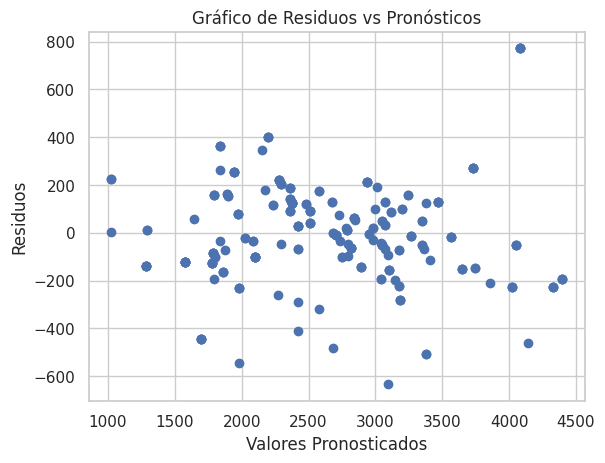

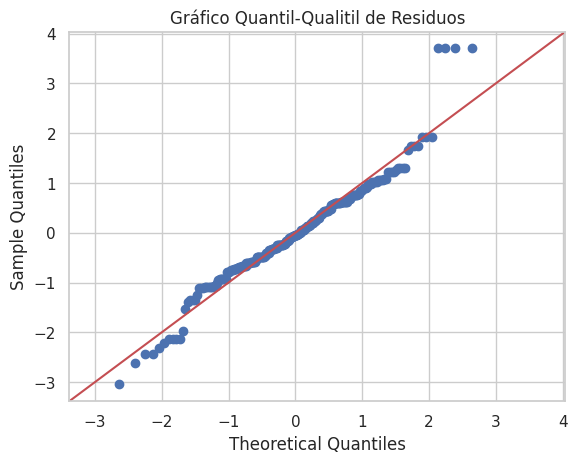

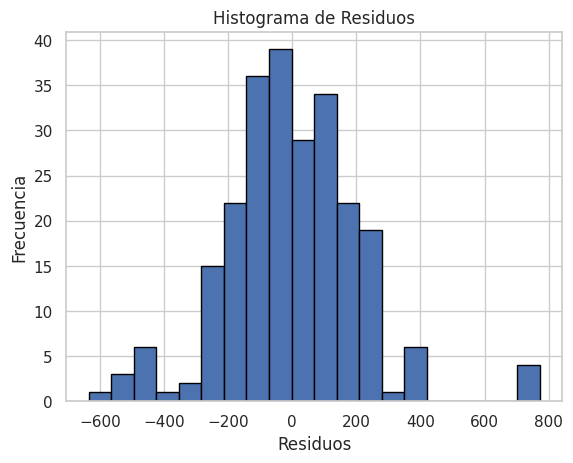

In [88]:
import matplotlib.pyplot as plt
# Gráfico de residuos vs predicciones
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Valores Pronosticados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Pronósticos')
plt.show()

# Q-Q Plot para verificar la normalidad de los residuos
sm.qqplot(model.resid, line='45', fit=True)
plt.title('Gráfico Quantil-Qualitil de Residuos')
plt.show()

# Histograma de los residuos
plt.hist(model.resid, bins=20, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

In [89]:
# ... tras haber ajustado tu modelo con sm.add_constant(X_train) ...

# 1) Añadir constante al test set
X_test_sm = sm.add_constant(X_test)

# 2) Predecir
y_pred = model.predict(X_test_sm)

# 3) Calcular métricas
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

# 4) Mostrar
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error (MSE): 41314.3991
Root Mean Squared Error (RMSE): 203.2594
R^2 Score: 0.9065


# Explicar el siguiente gráfico

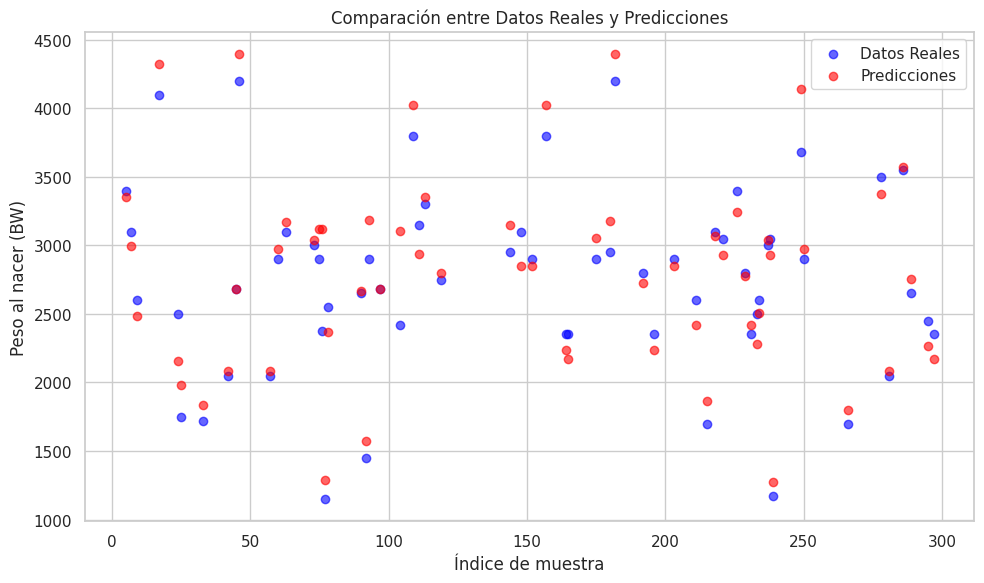

In [90]:
# 1) Asegúrate de añadir la constante al test set
X_test_sm = sm.add_constant(X_test)

# 2) Genera las predicciones
y_pred = model.predict(X_test_sm)

# 3) Dibuja la comparativa
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Puntos de test reales
plt.scatter(y_test.index, y_test, color='blue', label='Datos Reales', alpha=0.6)

# Puntos predichos
plt.scatter(y_test.index, y_pred, color='red', label='Predicciones', alpha=0.6)

plt.xlabel('Índice de muestra')
plt.ylabel('Peso al nacer (BW)')
plt.title('Comparación entre Datos Reales y Predicciones')
plt.legend()
plt.tight_layout()
plt.show()
